In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
from intersectiongraph import IntersectionGraph, IntersectionEdge, IntersectionNode

node1 = IntersectionNode(frozenset([1, 2, 3]))
node2 = IntersectionNode(frozenset([1, 2, 3]))
print(node1 == node2)

True


In [23]:
from queue import PriorityQueue

pq=PriorityQueue()
pq.put_nowait((1.22, "1fsfdax"))
pq.put_nowait((1.21, "4xadfa"))
pq.put_nowait((1.43, "3dfax"))

while not pq.empty():
    print(pq.get_nowait()[1])

4xadfa
1fsfdax
3dfax


In [21]:
import networkx as nx

G=nx.path_graph(4)
print(G.nodes)
print(G.edges)

G.remove_nodes_from([0,1])
print(G.nodes)
print(G.edges)

[0, 1, 2, 3]
[(0, 1), (1, 2), (2, 3)]
[2, 3]
[(2, 3)]


In [584]:

import simulator


grains, surfaces, graph, substrate = simulator.simulate_nucleation(rows=2,cols=2)
# for edge in graph.edges:
#     print([(surface.grain_id, surface.id) for surface in graph.edge_to_surfaces(edge)],[(surface.grain_id, surface.id) for surface in graph.edge_to_surfaces_all(edge)])
grains, event_handler = simulator.find_K_events(grains,graph, substrate)
# history, grains, graph, event_handler = simulator.simulate_lateral_growth(grains, graph, event_handler, time_limit=1000, max_steps=2)
history = simulator.simulate_vertical_growth(grains, graph, event_handler, time_limit=1000, max_steps=10)


Simulating nucleation...
finding initial collision events
Add Event: 1 (19.68379515162141, 0, Event: [54.34677089 26.65895244  0.         19.68379515], Surfaces: [Surface: 400, 0, Surface: 400, 6, Surface: 401, 6, Surface: None, -1])
Add Event: 0 (17.61393659127743, 1, Event: [23.84232164 58.95191126  8.69518509 17.61393659], Surfaces: [Surface: 400, 5, Surface: 400, 7, Surface: 402, 3, Surface: 402, 6])
Add Event: 1 (30.82163248177675, 2, Event: [53.46053545 52.77410531  0.         30.82163248], Surfaces: [Surface: 400, 0, Surface: 403, 3, Surface: 403, 7, Surface: None, -1])
Add Event: 1 (33.68920342767408, 3, Event: [49.69983716 40.64083342  9.99878794 33.68920343], Surfaces: [Surface: 401, 6, Surface: 402, 2, Surface: 402, 3, Surface: 402, 6])
Add Event: 1 (26.702964976005436, 4, Event: [74.55895853 64.88239902  0.         26.70296498], Surfaces: [Surface: 401, 3, Surface: 401, 6, Surface: 403, 4, Surface: None, -1])
Add Event: 1 (23.46351646385363, 5, Event: [49.55818246 82.249068

In [554]:
import numpy as np

a=np.array([1.,2.,3.])
b=np.array([surfaces[1].v_mu])
print(-a)
print(b)

[-1. -2. -3.]
[[ 0.88599601  0.45655633 -0.08103947 -1.        ]]


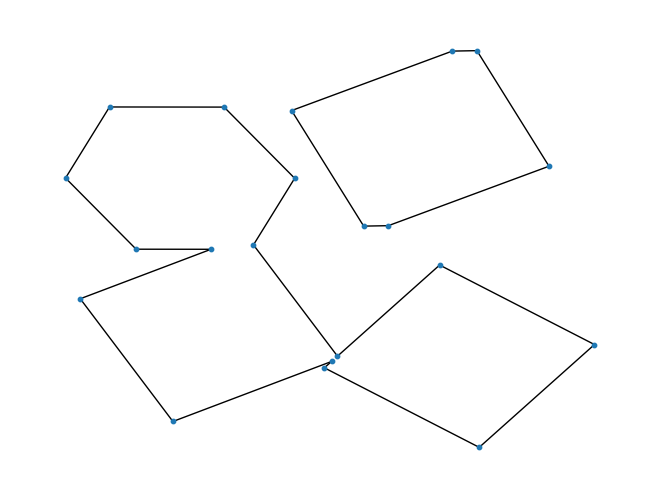

In [508]:
# plot substrate
from copy import deepcopy
graph_substrate = deepcopy(graph)
graph_substrate.remove_nodes_from([node for node in graph_substrate.nodes if graph_substrate.get_node_position(node,event_handler.get_time())[2]!=0])
coord=[graph_substrate.get_node_position(node,event_handler.get_time())[:2] for node in graph_substrate.nodes]
nx.draw(graph_substrate, dict(zip(graph_substrate.nodes, coord)) , node_size=10)
# graph.number_of_nodes()
# graph.number_of_edges()

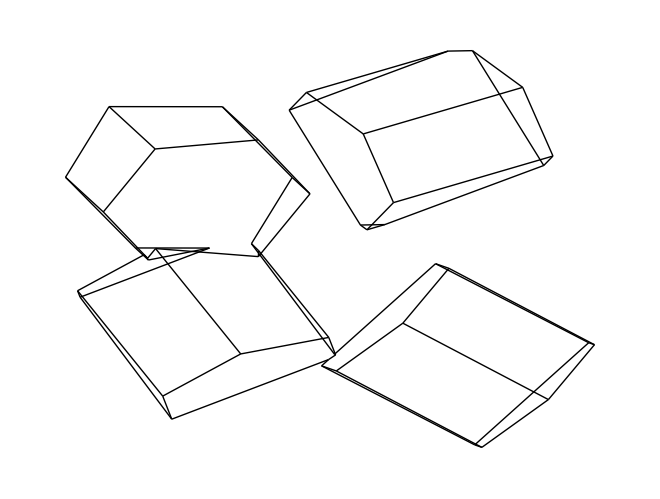

In [585]:
# plot topview

coord=[graph.get_node_position(node,event_handler.get_time())[:2] for node in graph.nodes]
size=[graph.get_node_position(node,event_handler.get_time())[2] for node in graph.nodes]
nx.draw(graph, dict(zip(graph.nodes, coord)) , node_size=0)

# graph.number_of_nodes()
# graph.number_of_edges()
